In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy import interpolate
from numpy.polynomial import Polynomial

In [74]:
#def 

In [75]:
fon1 = pd.read_csv('C:/Users/nout/Desktop/учеба/для дипл/пыль/анализы/пыление/за 15.03.24/TEST 4_001.csv', skiprows=36, usecols=[0,1,2,3,4], index_col='Elapsed Time [s]')
izm1 = pd.read_csv('C:/Users/nout/Desktop/учеба/для дипл/пыль/анализы/пыление/за 15.03.24/TEST 4_002.csv', skiprows=36, usecols=[0,1,2,3,4], index_col='Elapsed Time [s]')
izm1.head(2)

,PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3]
Elapsed Time [s],,,,
1,0.035,0.036,0.037,0.055
2,0.037,0.038,0.039,0.048


In [97]:
# Q1 = izm1.iloc[60:90].quantile(q=.25)
# Q3 = izm1.iloc[60:90].quantile(q=.75)
# IQR = izm1.iloc[60:90].apply(stats.iqr)

# izm1.iloc[60:90][~((izm1 < abs(Q1-1.5*IQR)) | (izm1 > (Q3+1.5*IQR))).any(axis=1)]

In [155]:
def delen(frame):
    sp = []
    n = 0
    for st in range(30, 301, 30):
        sp.append(frame[n:st])
        n += 30
    return sp

def delit_pic(lst):
    sp = []
    for df in lst:
        Q1 = df.quantile(q=.25)
        Q3 = df.quantile(q=.75)
        IQR = df.apply(stats.iqr)
        df = df[~((df < abs(Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
        sp.append(df)
    return sp
def cbork(lstr):
    df = pd.DataFrame(columns=izm1.columns)
    for fr in lstr:
        df = pd.concat([df, fr])
    return df

def  intr(fr):
    return cbork(delit_pic(delen(fr)))

In [157]:
intr(izm1)

# d = delen(izm1)
# e = delit_pic(d)
# sns.scatterplot(data=cbork(e))

,PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3]
7,1.730,2.150,2.910,3.900
8,1.780,2.210,2.950,3.920
9,1.780,2.210,2.970,3.880
10,1.800,2.240,3.000,3.910
11,1.570,1.980,2.700,3.610
...,...,...,...,...
296,0.362,0.450,0.577,0.705
297,0.354,0.443,0.569,0.703
298,0.357,0.446,0.576,0.705
299,0.345,0.431,0.562,0.701


In [ ]:
f = interpolate.interp1d(x=)

<Axes: xlabel='Elapsed Time [s]', ylabel='PM10 [mg/m3]'>

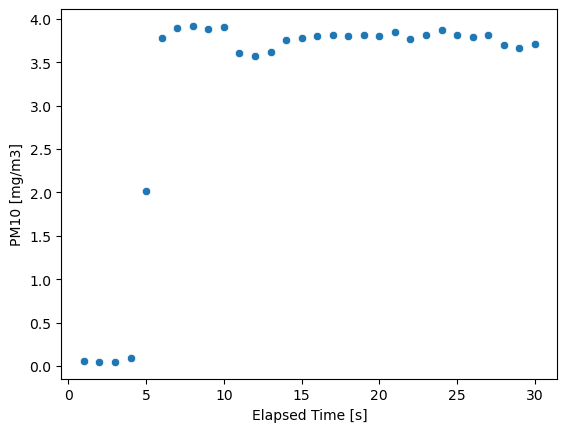

In [88]:
sns.scatterplot(data=izm1['PM10 [mg/m3]'][:30])

In [148]:
df = pd.DataFrame(columns=izm1.columns)
# pd.merge(df, e[0], left_index=True, right_index=True)
pd.concat([df, e[0]])

,PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3]
7,1.73,2.15,2.91,3.90
8,1.78,2.21,2.95,3.92
9,1.78,2.21,2.97,3.88
10,1.80,2.24,3.00,3.91
11,1.57,1.98,2.70,3.61
12,1.67,2.07,2.77,3.57
13,1.74,2.14,2.83,3.62
14,1.78,2.18,2.89,3.76
15,1.78,2.19,2.89,3.78
16,1.80,2.22,2.95,3.80


In [79]:
# def delit_pic(frames):
#     frame = frames.copy()
#     Q1 = frame.quantile(q=.25)
#     Q3 = frame.quantile(q=.75)
#     IQR = frame.apply(stats.iqr)
#     clean_frame = frame[~((frame < abs(Q1-1.5*IQR)) | (frame > (Q3+1.5*IQR))).any(axis=1)]
    
#
# delit_pic(izm1)

In [80]:
n =2
x = izm1['PM10 [mg/m3]'].rolling(window=n).mean().iloc[n-1:]

<Axes: xlabel='Elapsed Time [s]'>

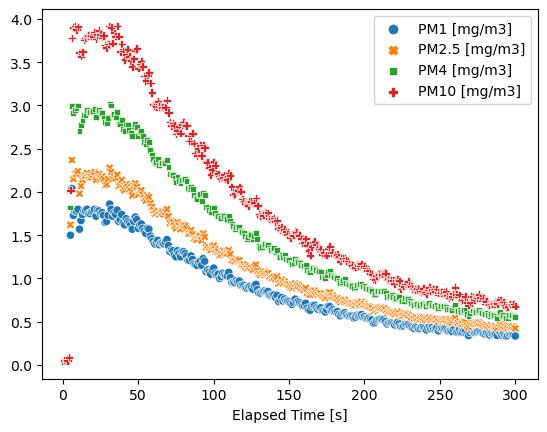

In [81]:
sns.scatterplot(data=izm1)

In [82]:
izm1.describe()

,PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3]
count,300.000000,300.000000,300.000000,300.000000
mean,0.879853,1.097920,1.448833,1.849590
std,0.489399,0.603228,0.812438,1.073066
min,0.035000,0.036000,0.037000,0.047000
25%,0.447250,0.564750,0.735500,0.908250
50%,0.720000,0.906000,1.180000,1.500000
75%,1.262500,1.587500,2.122500,2.687500
max,2.040000,2.370000,3.020000,3.920000


In [83]:

# def clean_df_pic(frame):
#     """
#     Удаление выбросов через Квартильный анализ,
#     Выбросы = наблюдения > Q3 + 1,5*IQR или Q1 – 1,5*IQR
    
#     """
#     Q1 = frame.quantile(q=.25)
#     Q3 = frame.quantile(q=.75)
#     IQR = frame.apply(stats.iqr)
    
    
#     clean_frame = frame[~((frame < abs(Q1-1.5*IQR)) | (frame > (Q3+1.5*IQR))).any(axis=1)]
#     return clean_frame


In [158]:
pd.DataFrame(columns=izm1.columns, index=izm1.index)

,PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3]
Elapsed Time [s],,,,
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
...,...,...,...,...
296,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN


In [110]:
def clean_df_pic(frame):
    """
    Удаление выбросов через Квартильный анализ,
    Выбросы = наблюдения > Q3 + 1,5*IQR или Q1 – 1,5*IQR
    
    """
    # vals = frame.copy()
    # n = 1
    # for i in range(31, 61, 30):
    #     Q1 = frame.iloc[n:i].quantile(q=.25)
    #     Q3 = frame.iloc[n:i].quantile(q=.75)
    #     IQR = frame.iloc[n:i].apply(stats.iqr)
    #     frame.iloc[n:i][~((frame < abs(Q1-1.5*IQR)) | (frame > (Q3+1.5*IQR))).any(axis=1)] = np.nan
    #     n += 30
    # df = vals[((vals < abs(Q1-1.5*IQR)) | (vals > (Q3+1.5*IQR))).any(axis=1)]
    # frame = frame[~((frame < abs(Q1-1.5*IQR)) | (frame > (Q3+1.5*IQR))).any(axis=1)]
    
    
    
    
    Q1 = frame[1:30].quantile(q=.25)
    Q3 = frame[1:30].quantile(q=.75)
    IQR = frame[1:30].apply(stats.iqr)
    frame[1:30][~((frame < abs(Q1-1.5*IQR)) | (frame > (Q3+1.5*IQR))).any(axis=1)] = np.nan
    return frame

In [111]:
t = clean_df_pic(izm1)


ValueError: Item wrong length 300 instead of 29!

In [ ]:
# fon1 = clean_df_pic(fon1)
# izm1 = clean_df_pic(izm1)

# sns.scatterplot(data=izm1)

In [ ]:
# sns.scatterplot(fon1)

In [ ]:
sp = list(izm1.index[140:])


<Axes: xlabel='Elapsed Time [s]'>

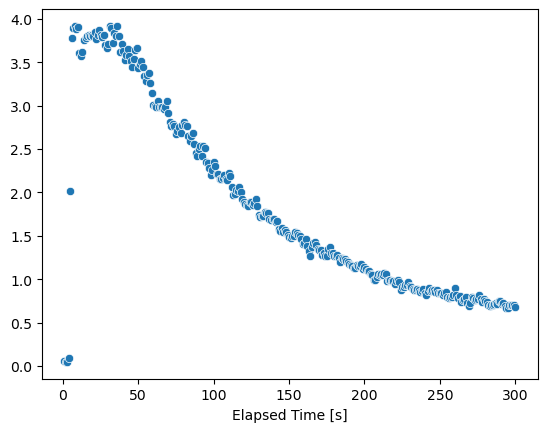

In [ ]:
poly = interpolate.interp1d(x=izm1.index, y=izm1['PM10 [mg/m3]'], kind='linear')

sns.scatterplot(x=izm1.index, y=poly(np.arange(1, 301)))

<Axes: xlabel='Elapsed Time [s]'>

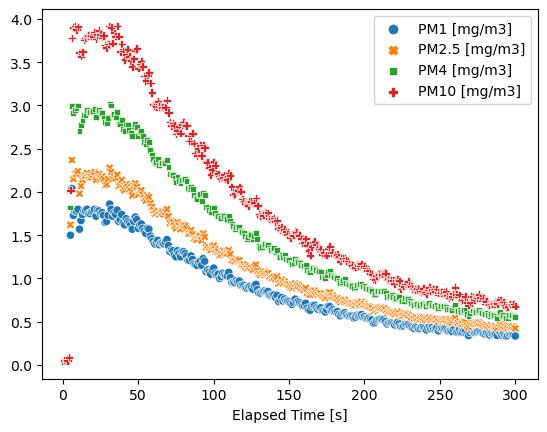

In [ ]:
fon1 = fon1.fillna(fon1.mean())
izm1 = izm1.fillna(izm1.mean())
sns.scatterplot(data=izm1)

In [ ]:
list(np.polyfit(x=cp_izm1.index, y=cp_izm1['PM10 [mg/m3]'], deg=2))

[-7.620913815903394e-05, -0.007912887163599149, 3.9293258574977736]

In [ ]:
def func_value(t):
    p = np.poly1d(np.polyfit(x=cp_izm1.index, y=cp_izm1['PM10 [mg/m3]'], deg=2))
    return p(t)

<Axes: >

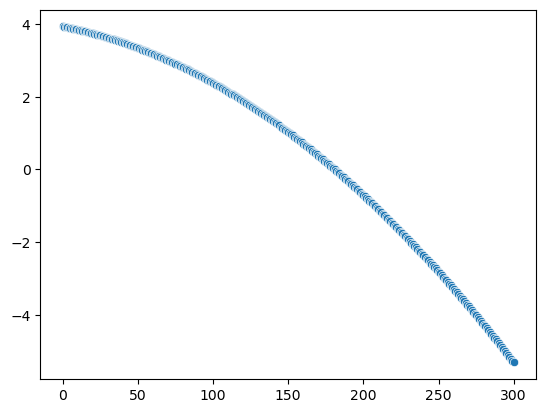

In [ ]:
sp = []
for i in range(0, 301):
    sp.append(func_value(i))
sns.scatterplot(x=np.arange(0, 301), y=sp)

In [ ]:
    
def func(frame):
    n = 2
    for st in frame:
        for t in range(5, 301):
            if frame[st][t] > n* frame[st][t - 1] or frame[st][t] < frame[st][t - 1] / n:
                frame[st][t] = frame[st][t - 1]
    return frame

<Axes: xlabel='Elapsed Time [s]'>

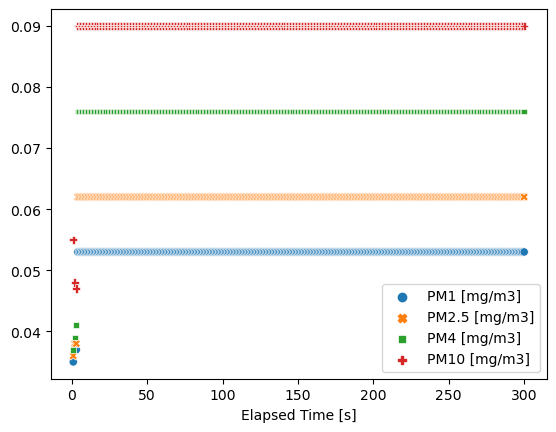

In [ ]:
c = izm1.copy()
c = func(c)
sns.scatterplot(data=c)